In [14]:
import pandas as pd
import numpy as np

In [19]:
experiments = 2
epochs = 40

activations = ['sigmoid', 'tanh', 'relu', 'linear', 'elu', 'selu', 'softplus', 'softsign', 'hard_sigmoid', 'LeakyReLU', 'ThresholdedReLU']
# activations = ['elu']
optimizers = ['rmsp', 'adam', 'sgd', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
# optimizers = ['rmsp', 'adam', 'sgd', 'Adagrad', 'Adadelta', 'Adamax']
# colors = ['b', 'g', 'k', 'y', 'm', 'r', 'c']
colors = ['#000000', '#330000', '#660000', '#990000', '#CC0000', '#FF0000',
          '#003300', '#006600', '#009900', '#00CC00', '#00FF00',
          '#000033', '#000066', '#000099', '#0000CC', '#0000FF',
          '#033000', '#066000', '#099000', '#0CC000', '#0FF000',
          '#000330', '#000660', '#000990', '#000CC0', '#000FF0']
lines = ['-', '--', ':', '-.']
cols_f = []
for c in colors:
    for l in lines:
        cols_f.append(c+l)
        

columns=['epoch', 'acc', 'loss', 'val_acc', 'val_loss']
data = []

i = 0
for act in activations:
    for opt in optimizers:
        item_data = []
        
        data.append({
            'name': '',
            'disp_name': act + '_' + opt,
            'col': colors[i % len(colors)],
            'line': lines[i % len(lines)],
            'act': act,
            'opt':opt,
#             'data' : [pd.read_csv('./logs/done/mnist_cnn_' + act +'_' + opt + '_' + str(epochs) + '_' + str(ex)  + '_fd_64.csv', sep=';') for ex in range(experiments)],
            'data' : [pd.read_csv('./logs/done/mnist_cnn_' + act +'_' + opt + '_' + str(epochs) + '_' + str(ex)  + '_64.csv', sep=';') for ex in range(experiments)],
            'averaged': pd.DataFrame(columns=['epoch', 'acc', 'loss', 'val_acc', 'val_loss']),
            'best': {
                'max_acc':0,
                'max_acc_epoch':0,
                'min_loss':0,
                'min_loss_epoch':0,
                'max_val_acc':0,
                'max_val_acc_epoch':0,
                'min_val_loss':0,
                'min_val_loss_epoch':0
            }
        })
        i+=1

max_epoch = 0
        

In [20]:
check = pd.DataFrame(columns=['config', 'exp', 'acc', 'loss', 'val_acc', 'val_loss', 'opt', 'act'])
i=0
for d in range(len(data)):
    for experiment in range(experiments):
        check.loc[i] = [data[d]['disp_name'], 
                          experiment,
                          data[d]['data'][experiment]['acc'].tolist()[-1], 
                          data[d]['data'][experiment]['loss'].tolist()[-1], 
                          data[d]['data'][experiment]['val_acc'].tolist()[-1], 
                          data[d]['data'][experiment]['val_loss'].tolist()[-1], 
                          data[d]['opt'], 
                          data[d]['act']]
        i+=1


In [21]:
check = check.sort_values(by=['val_acc'])
check

,config,exp,acc,loss,val_acc,val_loss,opt,act
90,softplus_Adagrad,0,0.097367,14.548733,0.0982,14.535301,Adagrad,softplus
119,hard_sigmoid_Adagrad,1,0.104417,14.435101,0.1028,14.461158,Adagrad,hard_sigmoid
153,ThresholdedReLU_Nadam,1,0.112367,2.301160,0.1135,2.301005,Nadam,ThresholdedReLU
118,hard_sigmoid_Adagrad,0,0.112367,2.301161,0.1135,2.301026,Adagrad,hard_sigmoid
123,hard_sigmoid_Adamax,1,0.112367,2.301160,0.1135,2.301014,Adamax,hard_sigmoid
125,hard_sigmoid_Nadam,1,0.112367,2.301159,0.1135,2.301020,Nadam,hard_sigmoid
140,ThresholdedReLU_rmsp,0,0.112367,2.301160,0.1135,2.301009,rmsp,ThresholdedReLU
141,ThresholdedReLU_rmsp,1,0.112367,2.301160,0.1135,2.301022,rmsp,ThresholdedReLU
142,ThresholdedReLU_adam,0,0.112367,2.301159,0.1135,2.301016,adam,ThresholdedReLU
143,ThresholdedReLU_adam,1,0.112367,2.301159,0.1135,2.301022,adam,ThresholdedReLU


In [22]:
check = check.sort_values(by=['val_acc'])
check

,config,exp,acc,loss,val_acc,val_loss,opt,act
90,softplus_Adagrad,0,0.097367,14.548733,0.0982,14.535301,Adagrad,softplus
119,hard_sigmoid_Adagrad,1,0.104417,14.435101,0.1028,14.461158,Adagrad,hard_sigmoid
149,ThresholdedReLU_Adadelta,1,0.112367,2.301159,0.1135,2.301010,Adadelta,ThresholdedReLU
150,ThresholdedReLU_Adamax,0,0.112367,2.301160,0.1135,2.301019,Adamax,ThresholdedReLU
151,ThresholdedReLU_Adamax,1,0.112367,2.301160,0.1135,2.301008,Adamax,ThresholdedReLU
146,ThresholdedReLU_Adagrad,0,0.112367,2.301160,0.1135,2.301023,Adagrad,ThresholdedReLU
147,ThresholdedReLU_Adagrad,1,0.112367,2.301160,0.1135,2.301024,Adagrad,ThresholdedReLU
152,ThresholdedReLU_Nadam,0,0.112367,2.301227,0.1135,2.301008,Nadam,ThresholdedReLU
145,ThresholdedReLU_sgd,1,0.112367,2.301160,0.1135,2.301016,sgd,ThresholdedReLU
144,ThresholdedReLU_sgd,0,0.112367,2.301160,0.1135,2.301019,sgd,ThresholdedReLU


In [23]:
for d in range(len(data)):
    max_acc = 0 
    max_val_acc = 0
    min_loss = 100
    min_val_loss = 100
    val_acc_diff = 0.
    
    min_val_acc_diff_10 = 1.
    min_val_acc_diff_epoch = 0
    
    has_hit = False

    for epoch in range(epochs):
        acc = []
        loss = []
        val_acc = []
        val_loss = []
        val_acc_diffs = []
        
        for experiment in range(experiments):
            acc.append(data[d]['data'][experiment].iloc[epoch]['acc'])
            loss.append(data[d]['data'][experiment].iloc[epoch]['loss'])
            val_acc.append(data[d]['data'][experiment].iloc[epoch]['val_acc'])
            val_loss.append(data[d]['data'][experiment].iloc[epoch]['val_loss'])
            if epoch > 0:
                val_acc_diffs.append(data[d]['data'][experiment].iloc[epoch]['val_acc'] - data[d]['data'][experiment].iloc[epoch-1]['val_acc'])
            else:
                val_acc_diffs.append(0)
        
        av_acc = sum(acc)/len(acc)
        av_loss = sum(loss)/len(loss)
        av_val_acc = sum(val_acc)/len(val_acc)
        av_val_loss = sum(val_loss)/len(val_loss)
        av_val_acc_diffs = sum(val_acc_diffs)/len(val_acc_diffs)
        std = np.std(val_acc)

        if(av_acc > max_acc):
            max_acc = av_acc
            data[d]['best']['max_acc'] = max_acc
            data[d]['best']['max_acc_epoch'] = epoch
        
#         if(av_val_acc > max_val_acc):
#             max_val_acc = av_val_acc
#             data[d]['best']['max_val_acc'] = max_acc
#             data[d]['best']['max_val_acc_epoch'] = epoch+1
        
        if(av_loss < min_loss):
            min_loss = av_loss
            data[d]['best']['min_loss'] = min_loss
            data[d]['best']['min_loss_epoch'] = epoch
        
        if(av_val_loss < min_val_loss):
            min_val_loss = av_val_loss
            data[d]['best']['min_val_loss'] = min_val_loss
            data[d]['best']['min_val_loss_epoch'] = epoch
        
        
        
        data[d]['averaged'] = data[d]['averaged'].append({
            'epoch': epoch,
            'acc': (av_acc),
            'loss': (av_loss),
            'val_acc': (av_val_acc),
            'val_loss': (av_val_loss),
            'val_acc_diff' : av_val_acc_diffs,
            'val_acc_std': std}, ignore_index=True)
        
        if epoch>5:
            av_val_acc_diff_10 = np.mean(np.absolute(data[d]['averaged'].iloc[epoch-6:epoch]['val_acc_diff'].values))
            
            if av_val_acc_diff_10 < 0.00005 and av_val_acc > max_val_acc:
                max_val_acc = av_val_acc
                data[d]['best']['max_val_acc'] = max_acc
                data[d]['best']['max_val_acc_epoch'] = epoch
                has_hit = True
#                 print('Config: ' + data[d]['disp_name'] + ', epoch: ' + str(epoch) + ', val_acc: '+ str(av_val_acc) +', diff: ' + str(av_val_acc_diffs) + ', av_diff: ' + str(av_val_acc_diff_10) + ' HIT!')
#             else:
#                 print('Config: ' + data[d]['disp_name'] + ', epoch: ' + str(epoch) + ', val_acc: '+ str(av_val_acc) +', diff: ' + str(av_val_acc_diffs) + ', av_diff: ' + str(av_val_acc_diff_10))
    if not has_hit:
        data[d]['best']['max_val_acc'] = data[d]['averaged'].iloc[epochs-1]['val_acc']
        data[d]['best']['max_val_acc_epoch'] = epochs
        print('Config: ' + data[d]['disp_name'] + ' had no hits, max val_acc: '+ str(data[d]['best']['max_val_acc']) +' at epoch ' + str(data[d]['best']['max_val_acc_epoch']))
    else:
        print('Config: ' + data[d]['disp_name'] + ' HAD HITS, max val_acc: '+ str(data[d]['best']['max_val_acc']) +' at epoch ' + str(data[d]['best']['max_val_acc_epoch']))

Config: sigmoid_rmsp had no hits, max val_acc: 0.98595 at epoch 40
Config: sigmoid_adam had no hits, max val_acc: 0.9874499999999999 at epoch 40
Config: sigmoid_sgd had no hits, max val_acc: 0.94475 at epoch 40
Config: sigmoid_Adagrad had no hits, max val_acc: 0.96795 at epoch 40
Config: sigmoid_Adadelta HAD HITS, max val_acc: 0.98905 at epoch 39
Config: sigmoid_Adamax had no hits, max val_acc: 0.9872000000000001 at epoch 40
Config: sigmoid_Nadam had no hits, max val_acc: 0.987 at epoch 40
Config: tanh_rmsp HAD HITS, max val_acc: 0.9991999999998333 at epoch 33
Config: tanh_adam HAD HITS, max val_acc: 0.9992833333335001 at epoch 38
Config: tanh_sgd had no hits, max val_acc: 0.9841 at epoch 40
Config: tanh_Adagrad HAD HITS, max val_acc: 0.9948083333333334 at epoch 35
Config: tanh_Adadelta HAD HITS, max val_acc: 0.9982333333333333 at epoch 33
Config: tanh_Adamax HAD HITS, max val_acc: 0.9991083333335 at epoch 35
Config: tanh_Nadam had no hits, max val_acc: 0.9834 at epoch 40
Config: relu_

In [24]:
results = pd.DataFrame(columns=['config', 'acc', 'loss', 'val_acc','val_acc_std', 'val_loss', 'opt', 'act', 'max_acc_epoch', 'max_val_acc_epoch', 'min_loss_epoch', 'min_val_loss_epoch'])
i=0
for d in data:
    results.loc[i] = [d['disp_name'], 
                      d['averaged']['acc'].tolist()[-1], 
                      d['averaged']['loss'].tolist()[-1], 
                      d['averaged']['val_acc'].tolist()[-1], 
                      d['averaged']['val_acc_std'].tolist()[-1],
                      d['averaged']['val_loss'].tolist()[-1], 
                      d['opt'], 
                      d['act'],
                      d['best']['max_acc_epoch'],
                     d['best']['max_val_acc_epoch'],
                     d['best']['min_loss_epoch'],
                     d['best']['min_val_loss_epoch'],]
    i+=1
    
    
    

In [25]:
results

,config,acc,loss,val_acc,val_acc_std,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
0,sigmoid_rmsp,0.989117,0.037744,0.98595,0.00015,0.043256,rmsp,sigmoid,39,40,39,27
1,sigmoid_adam,0.993783,0.020343,0.98745,0.00015,0.044014,adam,sigmoid,32,40,36,28
2,sigmoid_sgd,0.935250,0.220894,0.94475,0.00125,0.195983,sgd,sigmoid,38,40,38,39
3,sigmoid_Adagrad,0.962208,0.128969,0.96795,0.00085,0.109082,Adagrad,sigmoid,38,40,39,39
4,sigmoid_Adadelta,0.988692,0.037442,0.98615,0.00025,0.043468,Adadelta,sigmoid,34,39,31,27
5,sigmoid_Adamax,0.993342,0.022312,0.98720,0.00030,0.042756,Adamax,sigmoid,38,40,38,39
6,sigmoid_Nadam,0.996150,0.013087,0.98700,0.00070,0.047434,Nadam,sigmoid,39,40,36,19
7,tanh_rmsp,0.999208,0.003431,0.98535,0.00045,0.072951,rmsp,tanh,39,33,39,4
8,tanh_adam,0.999033,0.003276,0.98465,0.00095,0.078167,adam,tanh,29,38,35,4
9,tanh_sgd,0.986633,0.046166,0.98410,0.00050,0.049474,sgd,tanh,37,40,39,37


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

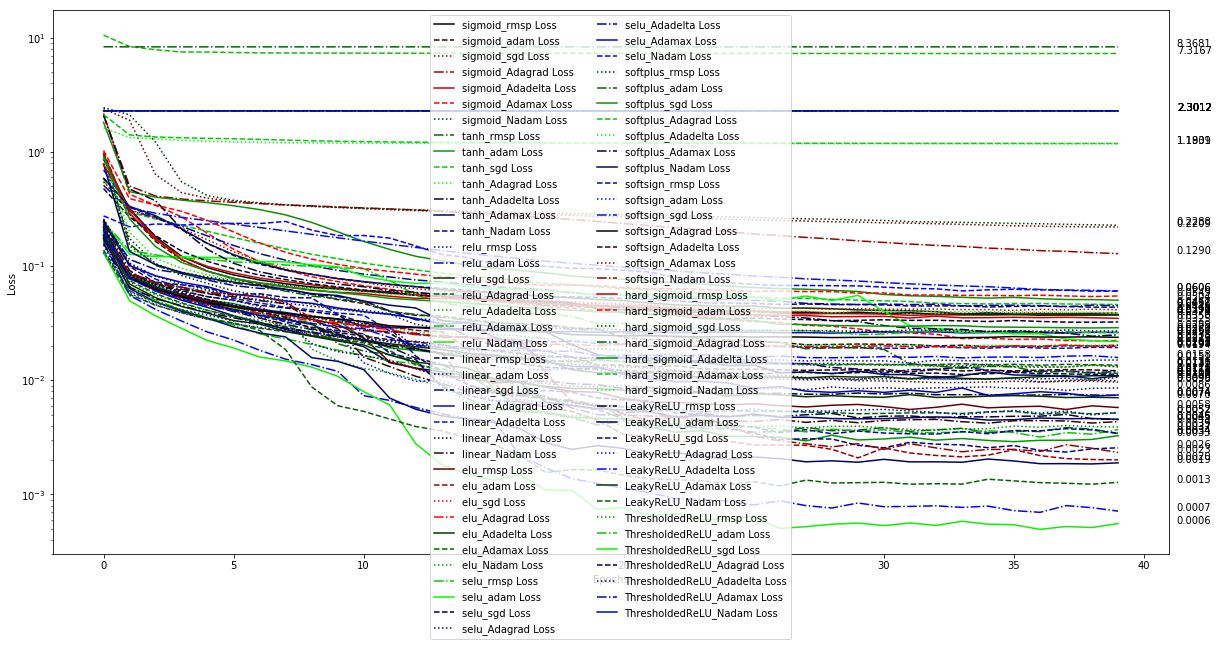

In [28]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs),
             d['averaged']['loss'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Loss')
    plt.annotate('%0.4f' % d['averaged']['loss'].tolist()[-1], xy=(1, d['averaged']['loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend(loc='upper center',ncol=2)

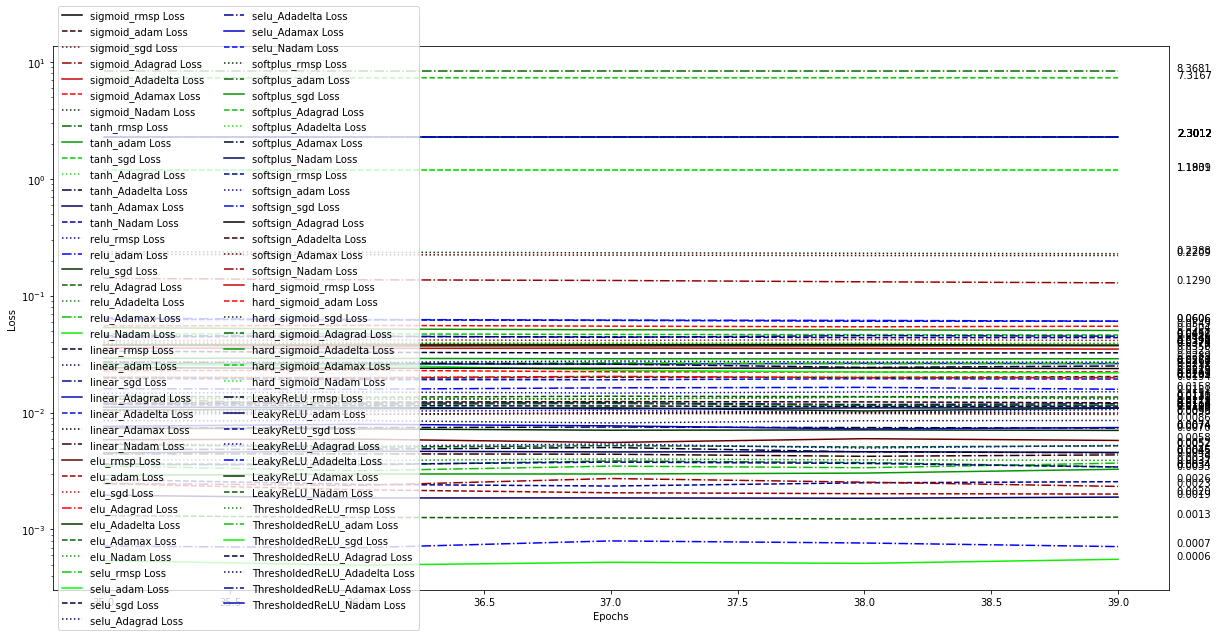

In [29]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['loss'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Loss')
    plt.annotate('%0.4f' % d['averaged']['loss'].tolist()[-1], xy=(1, d['averaged']['loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [30]:
sorted_by_loss = results.sort_values(by=['loss'])
sorted_by_loss

,config,acc,loss,val_acc,val_acc_std,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
20,relu_Nadam,0.999942,0.000556,0.99090,0.00030,0.050930,Nadam,relu,26,33,36,2
15,relu_adam,0.999875,0.000714,0.99055,0.00075,0.047360,adam,relu,33,29,36,5
69,LeakyReLU_Nadam,0.999842,0.001276,0.98830,0.00060,0.054539,Nadam,LeakyReLU,31,39,26,8
64,LeakyReLU_adam,0.999633,0.001892,0.98880,0.00030,0.051364,adam,LeakyReLU,29,39,38,3
29,elu_adam,0.999442,0.002010,0.98635,0.00015,0.075654,adam,elu,38,39,39,4
55,softsign_Nadam,0.999458,0.002336,0.98530,0.00000,0.089562,Nadam,softsign,30,40,39,3
13,tanh_Nadam,0.999358,0.002564,0.98340,0.00030,0.101519,Nadam,tanh,30,40,37,1
8,tanh_adam,0.999033,0.003276,0.98465,0.00095,0.078167,adam,tanh,29,38,35,4
49,softsign_rmsp,0.999183,0.003424,0.98625,0.00015,0.065608,rmsp,softsign,39,36,32,4
7,tanh_rmsp,0.999208,0.003431,0.98535,0.00045,0.072951,rmsp,tanh,39,33,39,4


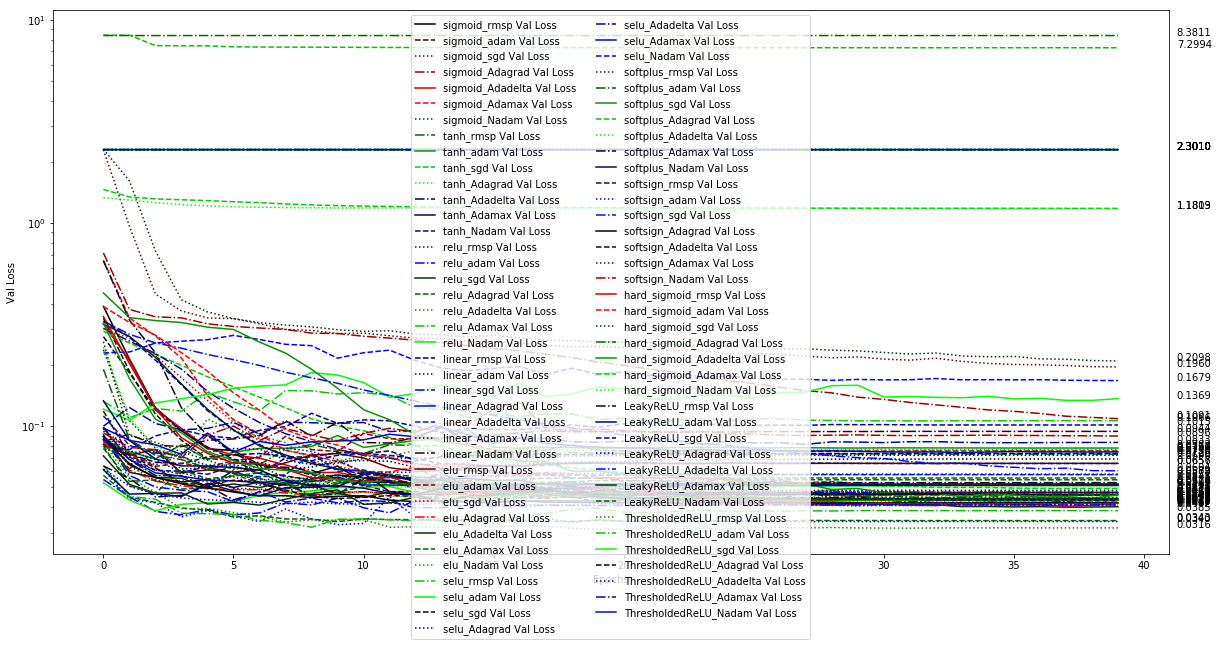

In [31]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs),
             d['averaged']['val_loss'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Loss')
    plt.annotate('%0.4f' % d['averaged']['val_loss'].tolist()[-1], xy=(1, d['averaged']['val_loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.yscale('log')
plt.legend(loc='upper center',ncol=2)

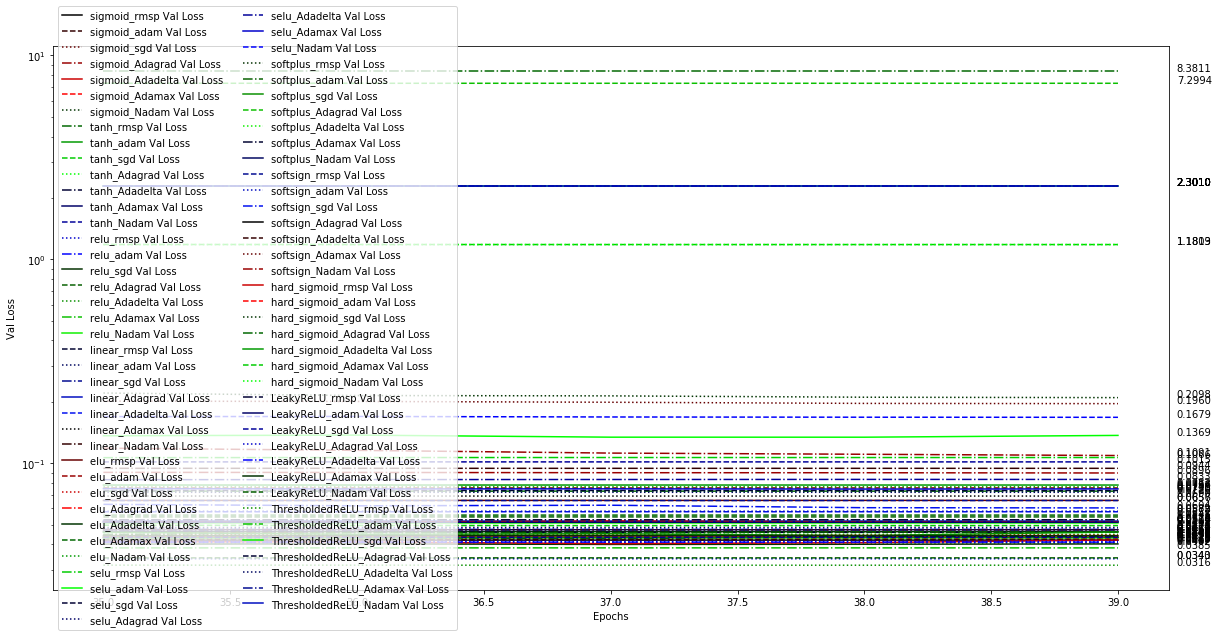

In [32]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['val_loss'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Loss')
    plt.annotate('%0.4f' % d['averaged']['val_loss'].tolist()[-1], xy=(1, d['averaged']['val_loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [33]:
sorted_by_val_loss = results.sort_values(by=['val_loss'])
sorted_by_val_loss

,config,acc,loss,val_acc,val_acc_std,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
18,relu_Adadelta,0.996517,0.013336,0.99030,0.00050,0.031611,Adadelta,relu,36,40,37,19
14,relu_rmsp,0.997008,0.010618,0.99095,0.00005,0.034012,rmsp,relu,27,33,38,9
17,relu_Adagrad,0.996217,0.013596,0.98960,0.00020,0.034349,Adagrad,relu,36,30,36,9
19,relu_Adamax,0.999008,0.003700,0.99010,0.00010,0.038453,Adamax,relu,36,35,36,8
16,relu_sgd,0.988567,0.037533,0.98695,0.00045,0.040202,sgd,relu,36,40,36,37
42,softplus_rmsp,0.988325,0.039041,0.98760,0.00070,0.040711,rmsp,softplus,36,40,32,29
67,LeakyReLU_Adadelta,0.995608,0.015850,0.98765,0.00065,0.041028,Adadelta,LeakyReLU,31,31,33,12
66,LeakyReLU_Adagrad,0.995992,0.015074,0.98740,0.00030,0.041348,Adagrad,LeakyReLU,35,32,31,18
52,softsign_Adagrad,0.993192,0.023831,0.98690,0.00040,0.041972,Adagrad,softsign,29,26,32,27
56,hard_sigmoid_rmsp,0.989667,0.034955,0.98675,0.00065,0.042015,rmsp,hard_sigmoid,33,40,39,37


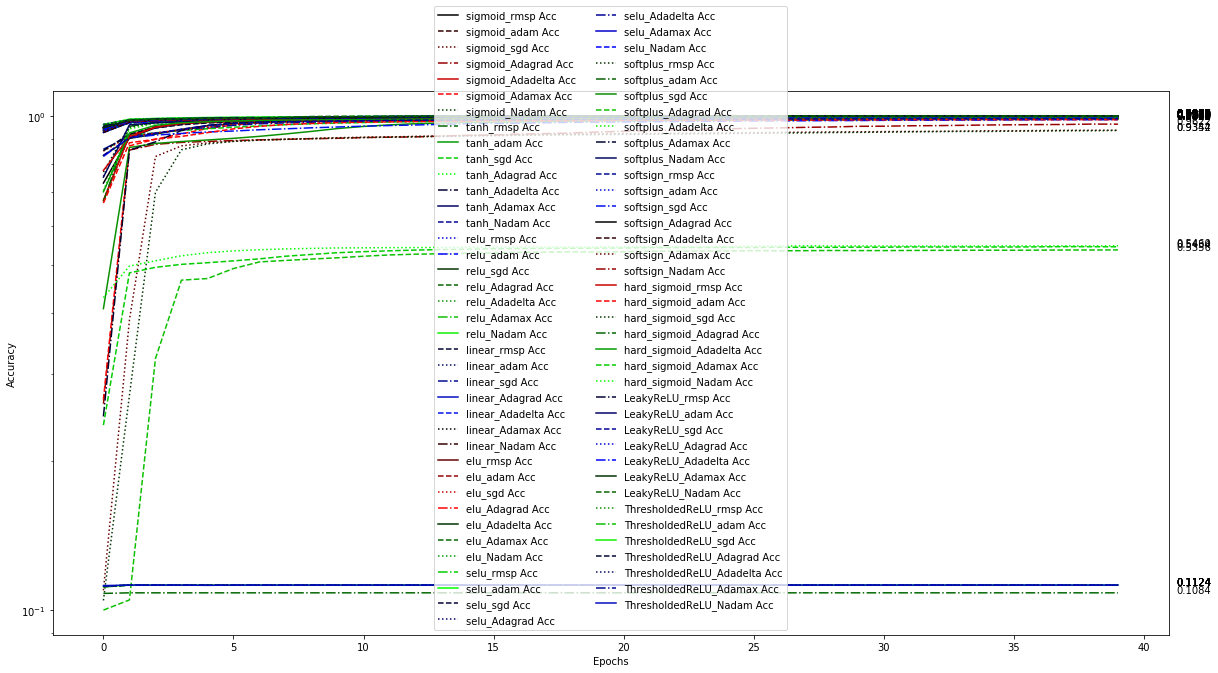

In [34]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs),
             d['averaged']['acc'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Acc')
    plt.annotate('%0.4f' % d['averaged']['acc'].tolist()[-1], xy=(1, d['averaged']['acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.yscale('log')
plt.legend(loc='lower center',ncol=2)

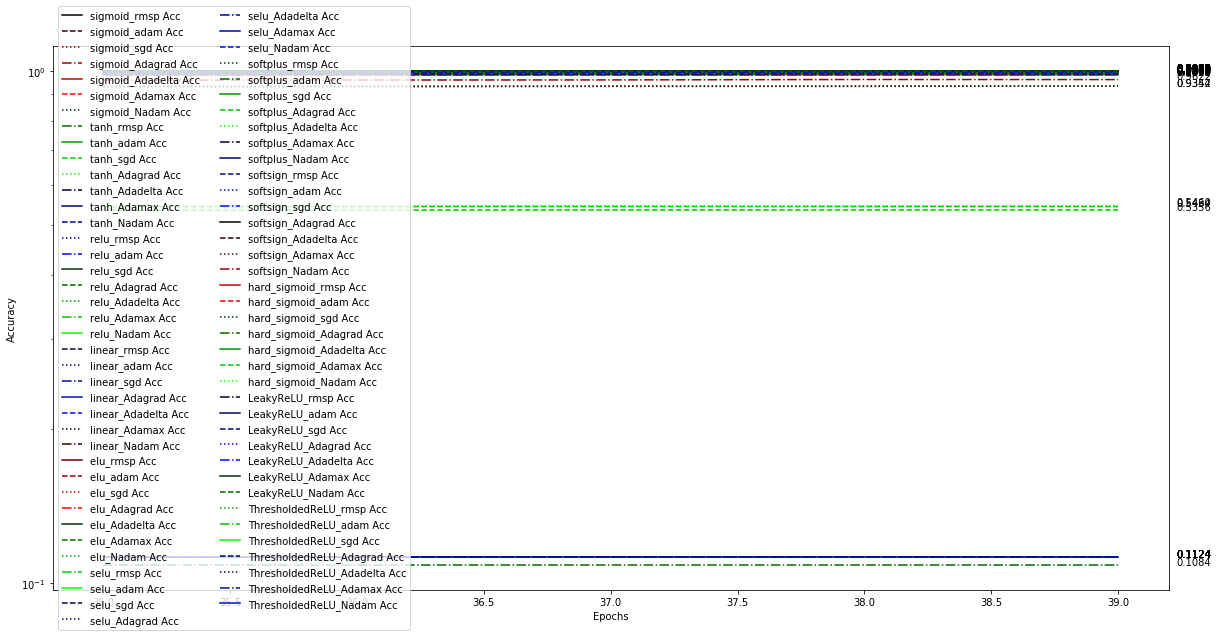

In [35]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['acc'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Acc')
    plt.annotate('%0.4f' % d['averaged']['acc'].tolist()[-1], xy=(1, d['averaged']['acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [36]:
sorted_by_acc = results.sort_values(by=['acc'], ascending=False)
sorted_by_acc

,config,acc,loss,val_acc,val_acc_std,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
20,relu_Nadam,0.999942,0.000556,0.99090,0.00030,0.050930,Nadam,relu,26,33,36,2
15,relu_adam,0.999875,0.000714,0.99055,0.00075,0.047360,adam,relu,33,29,36,5
69,LeakyReLU_Nadam,0.999842,0.001276,0.98830,0.00060,0.054539,Nadam,LeakyReLU,31,39,26,8
64,LeakyReLU_adam,0.999633,0.001892,0.98880,0.00030,0.051364,adam,LeakyReLU,29,39,38,3
55,softsign_Nadam,0.999458,0.002336,0.98530,0.00000,0.089562,Nadam,softsign,30,40,39,3
29,elu_adam,0.999442,0.002010,0.98635,0.00015,0.075654,adam,elu,38,39,39,4
13,tanh_Nadam,0.999358,0.002564,0.98340,0.00030,0.101519,Nadam,tanh,30,40,37,1
7,tanh_rmsp,0.999208,0.003431,0.98535,0.00045,0.072951,rmsp,tanh,39,33,39,4
49,softsign_rmsp,0.999183,0.003424,0.98625,0.00015,0.065608,rmsp,softsign,39,36,32,4
12,tanh_Adamax,0.999042,0.004561,0.98715,0.00005,0.051733,Adamax,tanh,34,35,34,5


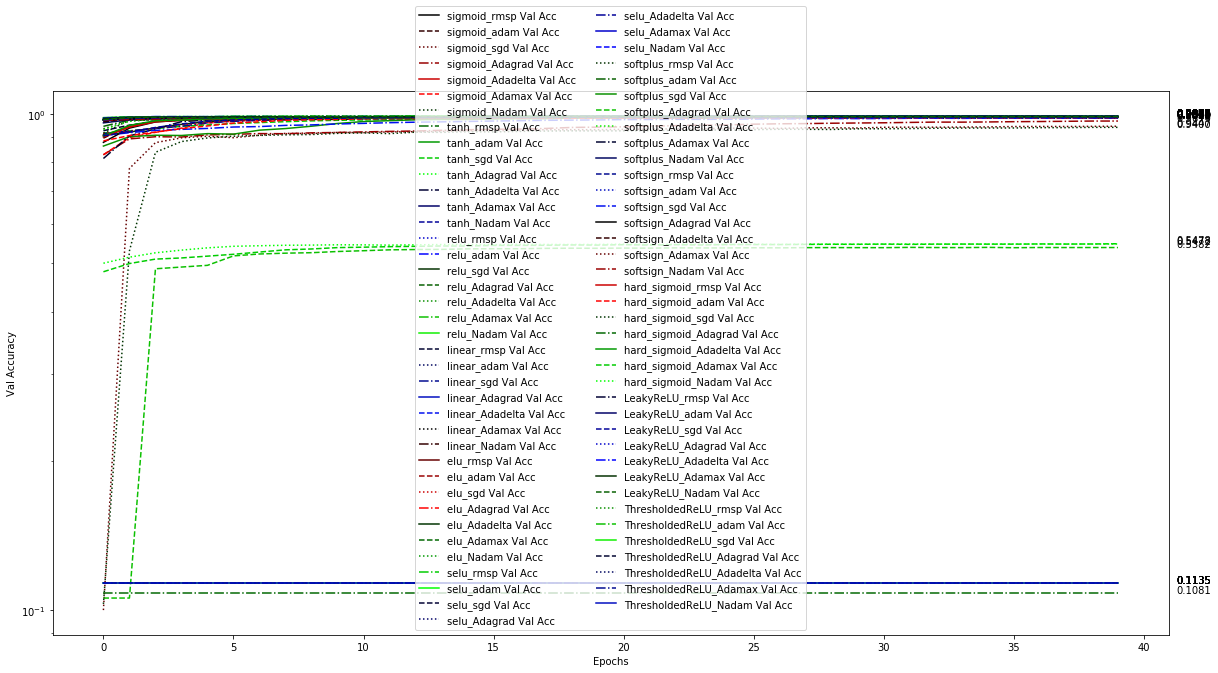

In [37]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs),
             d['averaged']['val_acc'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Acc')
    plt.annotate('%0.4f' % d['averaged']['val_acc'].tolist()[-1], xy=(1, d['averaged']['val_acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.yscale('log')
plt.legend(loc='lower center',ncol=2)

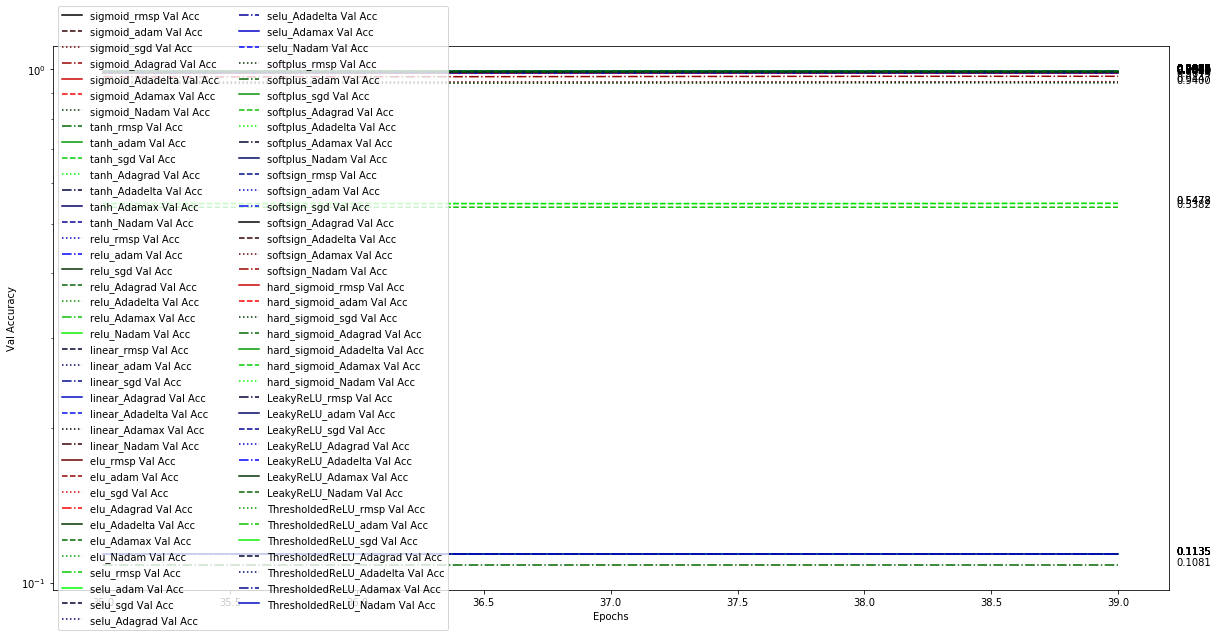

In [38]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['val_acc'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Acc')
    plt.annotate('%0.4f' % d['averaged']['val_acc'].tolist()[-1], xy=(1, d['averaged']['val_acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [39]:
sorted_by_val_acc = results.sort_values(by=['val_acc'], ascending=False)
sorted_by_val_acc

,config,acc,loss,val_acc,val_acc_std,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
14,relu_rmsp,0.997008,0.010618,0.99095,0.00005,0.034012,rmsp,relu,27,33,38,9
20,relu_Nadam,0.999942,0.000556,0.99090,0.00030,0.050930,Nadam,relu,26,33,36,2
15,relu_adam,0.999875,0.000714,0.99055,0.00075,0.047360,adam,relu,33,29,36,5
18,relu_Adadelta,0.996517,0.013336,0.99030,0.00050,0.031611,Adadelta,relu,36,40,37,19
19,relu_Adamax,0.999008,0.003700,0.99010,0.00010,0.038453,Adamax,relu,36,35,36,8
17,relu_Adagrad,0.996217,0.013596,0.98960,0.00020,0.034349,Adagrad,relu,36,30,36,9
43,softplus_adam,0.996475,0.011536,0.98920,0.00010,0.045908,adam,softplus,39,40,39,14
64,LeakyReLU_adam,0.999633,0.001892,0.98880,0.00030,0.051364,adam,LeakyReLU,29,39,38,3
40,selu_Adamax,0.997500,0.007449,0.98860,0.00090,0.074837,Adamax,selu,38,40,38,3
48,softplus_Nadam,0.996192,0.010970,0.98845,0.00035,0.047207,Nadam,softplus,36,40,32,13


In [42]:
print('---Top by Accuracy---')
print(sorted_by_acc.head())
print('\n---Top by Val Accuracy---')
print(sorted_by_val_acc.head())
print('\n---Top by Loss---')
print(sorted_by_loss.head())
print('\n---Top by Val Loss---')
print(sorted_by_val_loss.head())

---Top by Accuracy---
            config       acc      loss  val_acc  val_loss       opt  \
29     selu_Adamax  0.999200  0.002658   0.9910  0.067185    Adamax   
25       selu_adam  0.999083  0.002970   0.9916  0.075527      adam   
19       relu_adam  0.998483  0.004294   0.9940  0.027388      adam   
28   selu_Adadelta  0.997967  0.006892   0.9912  0.060575  Adadelta   
7   LeakyReLU_adam  0.997783  0.007051   0.9907  0.035072      adam   

          act  max_acc_epoch  max_val_acc_epoch  min_loss_epoch  \
29       selu           29.0               27.0            28.0   
25       selu           30.0               20.0            30.0   
19       relu           25.0               24.0            29.0   
28       selu           25.0               18.0            25.0   
7   LeakyReLU           25.0               24.0            25.0   

    min_val_loss_epoch  
29                 5.0  
25                17.0  
19                11.0  
28                 4.0  
7                 13.0 

In [57]:
results['acc_score'] = (results['acc'] - results['acc'].min()) / (results['acc'].max() - results['acc'].min())
results['val_acc_score'] = (results['val_acc'] - results['val_acc'].min()) / (results['val_acc'].max() - results['val_acc'].min())
results['loss_score'] = 1 - (results['loss'] - results['loss'].min()) / (results['loss'].max() - results['loss'].min())
results['val_loss_score'] = 1 - (results['val_loss'] - results['val_loss'].min()) / (results['val_loss'].max() - results['val_loss'].min())
results['val_acc_epoch_score'] = 1 - (results['max_val_acc_epoch'] - results['max_val_acc_epoch'].min()) / (results['max_val_acc_epoch'].max() - results['max_val_acc_epoch'].min())
results['total_score'] = results['acc_score'] * 0.5 + results['loss_score'] * 0.1 + results['val_acc_score'] + results['val_loss_score'] * 0.2 + results['val_acc_epoch_score'] * 0.5
results['total_score_norm'] = (results['total_score'] - results['total_score'].min()) / (results['total_score'].max() - results['total_score'].min())

In [58]:
sorted_by_score = results.sort_values(by=['total_score_norm'], ascending=False)
sorted_by_score.reset_index()

,index,config,acc,loss,val_acc,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch,acc_score,val_acc_score,loss_score,val_loss_score,val_acc_epoch_score,total_score,total_score_norm
0,1,sigmoid_adam,0.997183,0.008879,0.9915,0.035084,adam,sigmoid,46.0,38.0,47.0,39.0,1.000000,1.000000,1.000000,1.000000,0.244898,1.922449,1.000000
1,0,sigmoid_rmsp,0.978967,0.073984,0.9850,0.049791,rmsp,sigmoid,42.0,39.0,45.0,50.0,0.979536,0.992597,0.971617,0.993510,0.224490,1.890473,0.977521
2,4,sigmoid_Adadelta,0.985267,0.050691,0.9876,0.039324,Adadelta,sigmoid,50.0,50.0,50.0,50.0,0.986613,0.995558,0.981772,0.998129,0.000000,1.786668,0.904544
3,5,sigmoid_Adamax,0.927100,0.254242,0.9669,0.114263,Adamax,sigmoid,50.0,49.0,50.0,49.0,0.921269,0.971982,0.893034,0.965057,0.020408,1.725135,0.861286
4,6,sigmoid_Nadam,0.895550,0.390461,0.9267,0.271237,Nadam,sigmoid,50.0,49.0,50.0,50.0,0.885827,0.926196,0.833649,0.895782,0.020408,1.641835,0.802724
5,2,sigmoid_sgd,0.110917,2.301803,0.1135,2.300946,sgd,sigmoid,3.0,1.0,3.0,3.0,0.004381,0.000000,0.000395,0.000037,1.000000,0.502238,0.001573
6,3,sigmoid_Adagrad,0.107017,2.302709,0.1135,2.301031,Adagrad,sigmoid,25.0,1.0,50.0,9.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000


In [59]:
sorted_by_score.to_csv('./results.csv')

In [60]:
val_loss_tbl = pd.DataFrame(index=['Adadelta', 'Adagrad', 'adam', 'Adamax', 'Nadam', 'rmsp', 'sgd'], 
                            columns=['elu', 'hard_sigmoid', 'LeakyReLU', 'linear', 'PReLU', 'relu', 'selu', 'sigmoid', 'softplus', 
                                     'softsign', 'tanh', 'ThresholdedReLU'])
